In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df=pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
df['overweight'] = (df['weight']/((df['height']/100)**2))
df['overweight'].head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: overweight, dtype: float64

In [34]:
df['overweight']=df['overweight'].apply(lambda x: 1 if x>25 else 0) #i canuse the lamda funcction to iterate each row
df['overweight'].head()

0    0
1    1
2    0
3    1
4    0
Name: overweight, dtype: int64

In [35]:
# `cholesterol` or `gluc`
#is 1, make the value 0 If the value is more than 1, make the value 1.
df['cholesterol']=df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)


In [36]:
df['gluc']=df['gluc'].apply(lambda x : 0 if x == 1 else 1)


In [37]:
#Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. 
# The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. 
# The chart should look like `examples/Figure_1.png`.
df_cat=pd.melt(df, id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])


In [ ]:
df_cat['total']=1
df_cat = df_cat.groupby(['cardio','variable','value'], as_index=False).count()
df_cat

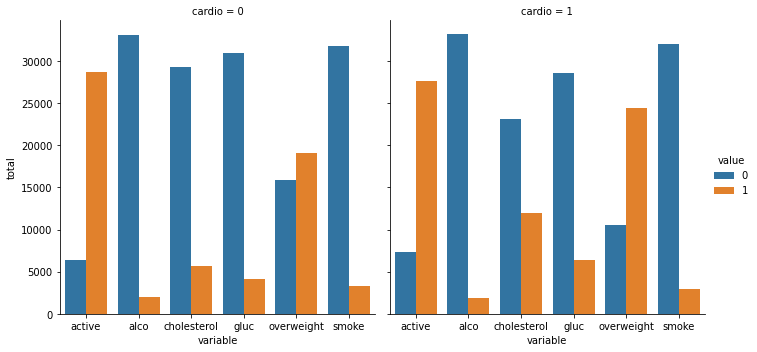

In [39]:
fig=sns.catplot(x= "variable", y= "total", data=df_cat, hue="value", kind="bar", col='cardio').fig

fig.savefig('catplot.png')


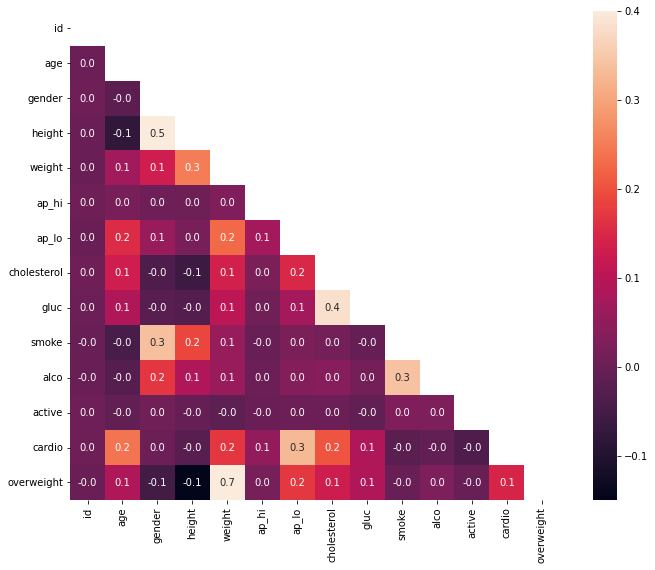

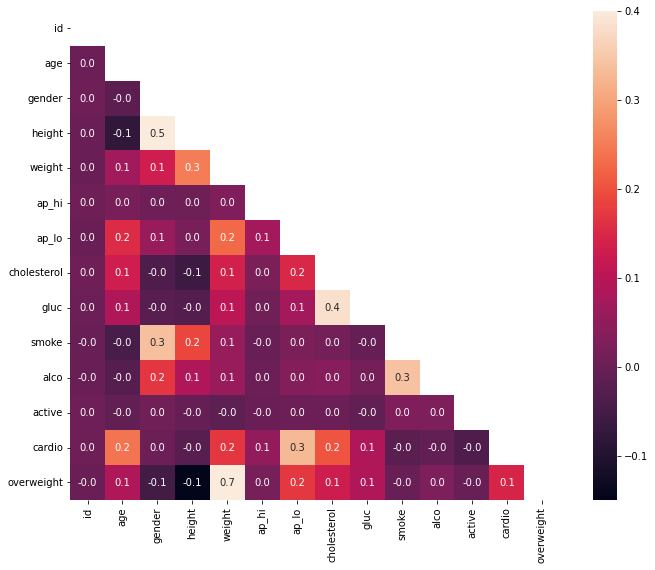

In [41]:
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[
        (df["ap_lo"] <= df["ap_hi"])
        & (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    # with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(
        corr,
        mask=mask,
        vmax=0.4,
        square=True,
        fmt=".1f",
        annot=True,
    )

    # Do not modify the next two lines
    # fig.savefig("heatmap.png")
    # Don't save to file
    return fig
draw_heat_map()